# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

- Business Objective (1-2 sentences): Understanding what factors drive the price of a used car.Segmenting the market based on the price of the car and the features of the car.

- Assess Situation: Recent sales to assess the current situation of the market. Understand the current market and the current prices of used cars.

- Determine Data Science Goals: Identify opportunities to improve the company's marketing and sales processes    

- Produce Project Plan: Identify the data that is needed to answer the business quest. Identify the resources needed to complete the project. Identify the timeline for the project.Develope a risk assessment for the project.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

- Collect Initial Data: Collect the data from the source.

- Describe Data: Describe the data and the features of the data.

- Explore Data: Explore the data to understand the data and the features of the data. look for key features that can help in achieving the business objective.

- Verify Data Quality: Verify the quality of the data looking at the missing values, the outliers, and the data types.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

- Select Data: Select the data that is needed to answer the business question. We may need to drop the features that may not help in answering the business question.

- Cleaning Data: Make sure that data is complete and that there are no missing values. Make sure that the data is in the correct format.

- Construct Data: Create new features that may help in answering the business question.This may include creating dummy variables for categorical features using one hot encoding or feature engineering.

- Integrate Data: Merge the data from different sources if needed.

- Format Data: Make sure that the data is in the correct format for the model.Check if standard scaling or normalization is needed or binarization is needed.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [1]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
vehicles = pd.read_csv('data/vehicles.csv')

In [3]:
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
vehicles = vehicles.dropna()
# vehicles = vehicles.dropna(axis=0, how='any', subset=['price'])
vehicles.drop(vehicles[vehicles['price'] ==0].index, inplace = True)
vehicles['condition'].replace('salvage', 'condition_salvage', inplace=True)
print(vehicles.isna().sum())

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64


In [5]:
df = vehicles[['title_status','odometer','condition' ,'year','price']].dropna(axis=0, subset=('title_status','odometer','condition' ,'year','price'))
df['year'] = df['year'].astype(int)
df.head()

,title_status,odometer,condition,year,price
215,clean,155000.0,excellent,2002,4000
219,clean,110661.0,fair,1995,2500
268,clean,56700.0,excellent,2008,9000
337,clean,164000.0,excellent,2011,8950
338,clean,88100.0,fair,1972,4000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32496 entries, 215 to 426833
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title_status  32496 non-null  object 
 1   odometer      32496 non-null  float64
 2   condition     32496 non-null  object 
 3   year          32496 non-null  int32  
 4   price         32496 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 1.4+ MB


In [7]:
df[df.isna().any(axis=1)]

,title_status,odometer,condition,year,price


In [8]:
df['title_status'].value_counts()

title_status
clean         31321
rebuilt         786
salvage         239
lien            134
missing          14
parts only        2
Name: count, dtype: int64

In [9]:
df['condition'].value_counts()

condition
excellent            18259
good                  9772
like new              3772
fair                   488
new                    169
condition_salvage       36
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ct = make_column_transformer(
    (scaler, ["odometer","price"])
)
# Add the column transformer to the dataframe
transformed_data=pd.DataFrame(ct.fit_transform(df),columns=['odometer','price'])
transformed_data.head()

,odometer,price
0,0.449957,-0.982925
1,0.016406,-1.096397
2,-0.511230,-0.604687
3,0.537960,-0.608470
4,-0.204198,-0.982925


In [11]:
print(transformed_data.isna().sum())

odometer    0
price       0
dtype: int64


In [12]:
df.drop(['odometer','price'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
transformed_data.reset_index(drop=True, inplace=True)
df = pd.concat([df, transformed_data], axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32496 entries, 0 to 32495
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title_status  32496 non-null  object 
 1   condition     32496 non-null  object 
 2   year          32496 non-null  int32  
 3   odometer      32496 non-null  float64
 4   price         32496 non-null  float64
dtypes: float64(2), int32(1), object(2)
memory usage: 1.1+ MB


In [14]:
df.head()

,title_status,condition,year,odometer,price
0,clean,excellent,2002,0.449957,-0.982925
1,clean,fair,1995,0.016406,-1.096397
2,clean,excellent,2008,-0.511230,-0.604687
3,clean,excellent,2011,0.537960,-0.608470
4,clean,fair,1972,-0.204198,-0.982925


In [15]:
ct = make_column_transformer(
    (OneHotEncoder(), ["title_status","condition"]),
    remainder="passthrough",
    verbose_feature_names_out=True,
)
# Add the column transformer to the dataframe
transformed_data=pd.DataFrame(ct.fit_transform(df),columns=ct.named_transformers_['onehotencoder'].categories_[0].tolist()+ct.named_transformers_['onehotencoder'].categories_[1].tolist()+['year','odometer','price'])
transformed_data.head()

,clean,lien,missing,parts only,rebuilt,salvage,condition_salvage,excellent,fair,good,like new,new,year,odometer,price
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2002.0,0.449957,-0.982925
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1995.0,0.016406,-1.096397
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2008.0,-0.511230,-0.604687
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2011.0,0.537960,-0.608470
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1972.0,-0.204198,-0.982925


In [16]:
print(transformed_data.isna().sum())

clean                0
lien                 0
missing              0
parts only           0
rebuilt              0
salvage              0
condition_salvage    0
excellent            0
fair                 0
good                 0
like new             0
new                  0
year                 0
odometer             0
price                0
dtype: int64


In [17]:
transformed_data[transformed_data.isna().any(axis=1)]

,clean,lien,missing,parts only,rebuilt,salvage,condition_salvage,excellent,fair,good,like new,new,year,odometer,price


Sequential feature selection with validation error

In [18]:
X = transformed_data.drop(['price'], axis = 1)
y = transformed_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=3)
best_features = selector.fit_transform(X_train, y_train)
best_features_df = pd.DataFrame(best_features, columns = selector.get_feature_names_out())
best_features_df.head()

,fair,like new,year
0,0.0,0.0,2016.0
1,1.0,0.0,2000.0
2,0.0,0.0,2013.0
3,0.0,0.0,2016.0
4,0.0,0.0,2017.0


Regularization -- taking all features into account

In [20]:
ridge_model = Ridge().fit(X_train, y_train)
ridge_model_coefs = ridge_model.coef_

In [21]:
print(f'Ridge Coefs: {np.round(ridge_model_coefs, 2)}')

Ridge Coefs: [-0.01  0.26  0.04  0.3  -0.15 -0.44 -0.35 -0.05 -0.47 -0.01  0.24  0.65
  0.04 -0.2 ]


In [22]:
alphas = [0.001, 1.0, 10.0, 100.0]
coef_list = []
coefs_df = pd.DataFrame()
coefs_df =coefs_df.assign(feature=X_train.columns)
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    coef_list.append(list(ridge.coef_))
    coefs_df =coefs_df.assign(alpha=list(ridge.coef_))
    coefs_df =coefs_df.rename(columns={"alpha":alpha})
# len(coef_list)
# print('For alpha = 100 we have the following coefficients:')
# list(zip(X_train.columns, coef_list[-1]))
coefs_df.head(20)

,feature,0.001,1.0,10.0,100.0
0,clean,-0.064238,-0.009759,0.053368,0.093128
1,lien,0.212649,0.264117,0.297700,0.178495
2,missing,-0.011199,0.038902,0.052043,0.012133
3,parts only,0.561292,0.296024,0.051416,0.004315
4,rebuilt,-0.207069,-0.152466,-0.088737,-0.044877
5,salvage,-0.491434,-0.436817,-0.365790,-0.243195
6,condition_salvage,-0.368027,-0.347504,-0.266958,-0.088808
7,excellent,-0.050629,-0.054008,-0.064385,-0.071902
8,fair,-0.471232,-0.473205,-0.470762,-0.380942
9,good,-0.011397,-0.014770,-0.024961,-0.031489


Let's check the importance of features using TransformedTargetRegressor and Permutation Importance

In [23]:
target_regressor_model = make_pipeline(
    TransformedTargetRegressor(regressor=Ridge(alpha=10))
)

In [24]:
target_regressor_model.fit(X_train,y_train)

Pipeline(steps=[('transformedtargetregressor',
                 TransformedTargetRegressor(regressor=Ridge(alpha=10)))])

In [25]:
orig_model_score = target_regressor_model.score(X_train, y_train)
print(orig_model_score)

0.15000144982626884


In [26]:
from sklearn.inspection import permutation_importance

scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
r_multi = permutation_importance(target_regressor_model, X_test, y_test, n_repeats=30, random_state=0)

In [27]:
mean_square_diff= abs((orig_model_score - r_multi['importances_mean']))
print(mean_square_diff)

[0.14955411 0.1491437  0.14999528 0.15001326 0.14925068 0.14834157
 0.14975408 0.147183   0.14540842 0.14981605 0.14005564 0.14323422
 0.02207701 0.08627617]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'clean'),
  Text(1, 0, 'lien'),
  Text(2, 0, 'missing'),
  Text(3, 0, 'parts only'),
  Text(4, 0, 'rebuilt'),
  Text(5, 0, 'salvage'),
  Text(6, 0, 'condition_salvage'),
  Text(7, 0, 'excellent'),
  Text(8, 0, 'fair'),
  Text(9, 0, 'good'),
  Text(10, 0, 'like new'),
  Text(11, 0, 'new'),
  Text(12, 0, 'year'),
  Text(13, 0, 'odometer')])

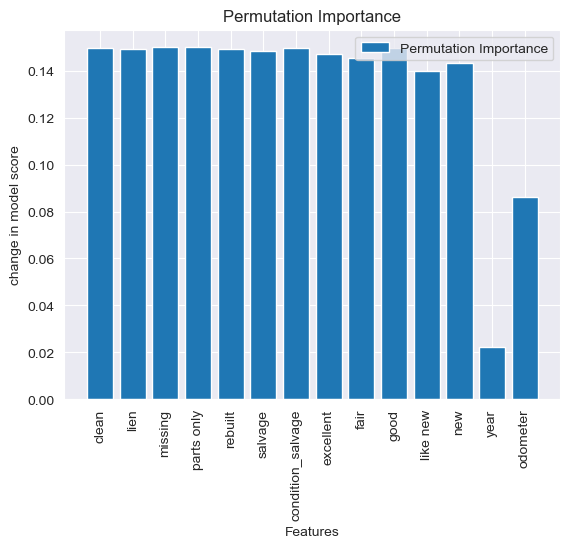

In [28]:
from matplotlib import pyplot as plt

plt.bar(X.columns,mean_square_diff, label="Permutation Importance")
plt.legend()

# The following commands add labels to our figure.
plt.xlabel('Features')
plt.ylabel('change in model score')
plt.title('Permutation Importance')
plt.xticks(rotation=90)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Evaluate Results: Used both Sequential and Ridge Model to train and test the data. One objective is to look at the impact of features and as per the results, looks like title status and condition are the most important features. The other objective is to look at the impact of the model on the price of the car. 

Review Process: Since we have some results, it is time to ask business stakeholders to review the results and provide feedback. We can also ask the stakeholders to provide more data if needed.

Determine next steps: We can use the results to segment the market based on the price of the car and the features of the car. We can also use the results to improve the company's marketing and sales processes.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Plan Development: Now ask the used car dealers to develop a plan to implement the recommendations.

Plan Monitoring and Maintenance: Develop a plan to monitor the model and maintain the model. This may include monitoring the model for accuracy and retraining the model if needed.

Produce Final Report: Business should focus more the condition, less mileage and the title status of the car. The business should also focus on the year of the car. 